In [7]:

import Model as model
import matplotlib.pyplot as plt

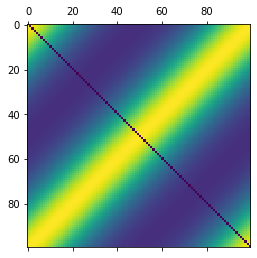

In [8]:
plt.matshow(model.Sensory_Layer().get_weights_matrix())
plt.show()